In [ ]:

import flask
%matplotlib widget
from flask import Flask, jsonify, request
from flask_cors import CORS, cross_origin
from matplotlib import pyplot as plt
from handler.WarehouseHandler import WarehouseHandler
from DAO.racksDAO import RacksDao
from DAO.warehouseDAO import warehouseDAO
from DAO.partsDAO import PartsDAO
from main import app
from handler.RacksHandler import RacksHandler
import requests
from main import app
import pandas as pd
import ipywidgets
from IPython.display import display, clear_output
from IPython.utils import capture
from IPython.utils.capture import capture_output
from debugpy.launcher import output

import pandas as pd
#import sys
#sys.path.append('http://127.0.0.1:5000/')
#app.app_context().push()

Dropdown(description='Number: ', options=(21, 2, 7, 3, 14, 13, 9, 4, 5, 11, 12, 10, 15, 6, 8), value=21)

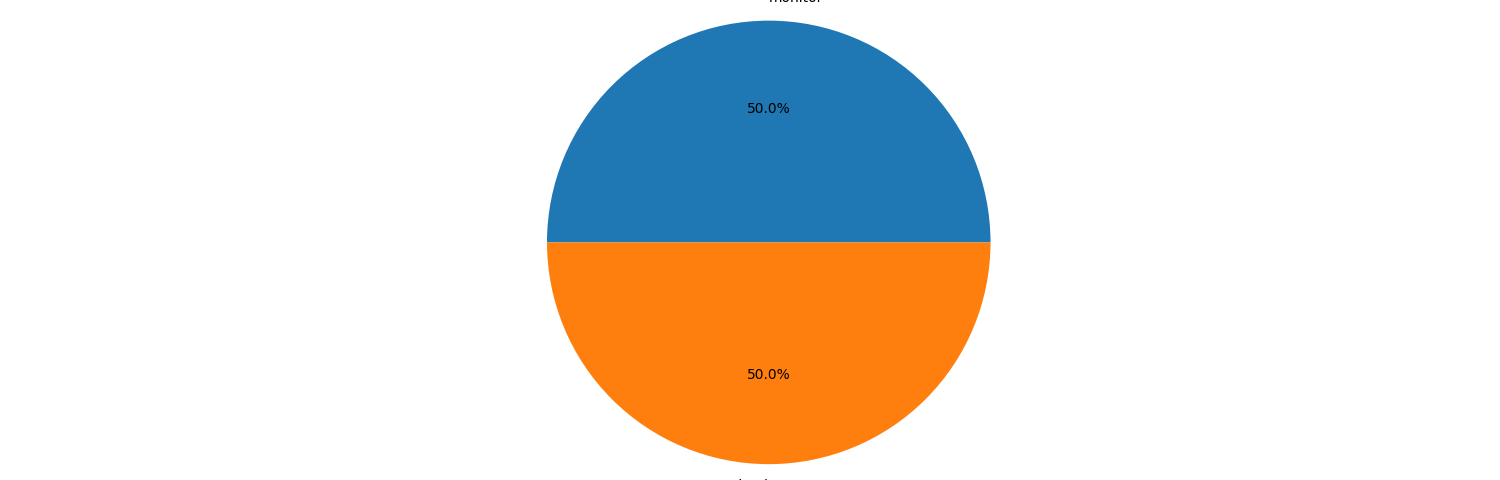

In [21]:
with app.app_context():
 api_url = 'http://127.0.0.1:5000/rhasql/warehouse'
 request = requests.get(api_url)
 respone = request.json()
 wid = []
    
 for x in respone:
    wid.append(x['w_id'])
        
 dropdown = ipywidgets.Dropdown(
        options=wid,
        value=wid[0],
        description='Warehouse id: ',
        disabled=False
    )
 output = ipywidgets.Output()
 display(dropdown)
 plt.show()


In [22]:

@output.capture(clear_output=True, wait=True)
def when_changed(change):
  #with output:
    #print('tumai')
    if change['name'] == 'value' and (change['new'] != change['old']):
        clear_output()
        api_url =f'http://127.0.0.1:5000/rhasql/warehouse/{dropdown.value}/PartInWarehouse'
        response = requests.get(api_url)
    
        pName = []
        pAmount = []
        result = []
    
        for x in response.json():
            pName.append(x['p_name'])
            pAmount.append(x['r_amount'])
        plt.figure().set_figwidth(15)
        plt.pie(pAmount,labels=pName, autopct='%1.1f%%', radius=1.5)
        plt.show()
#print('tumai')
dropdown.observe(when_changed, 'value')
output

tumai


Output()